In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [5]:
df = pd.read_csv("supermarket_sales.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [7]:
# 轉換日期格式
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.dayofyear
df['Month'] = df['Date'].dt.to_period('M')

# 總覽
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [8]:
# 平均每單消費金額
df['avg_price'] = df['Total'] / df['Quantity']

# 各城市銷售總額
city_sales = df.groupby('City')['Total'].sum()

# 各產品線平均利潤
product_profit = df.groupby('Product line')['gross income'].mean()

# 用 numpy 做銷售標準差
sales_std = np.std(df['Total'])
print(f"Sales standard deviation: {sales_std:.2f}")


Sales standard deviation: 245.76


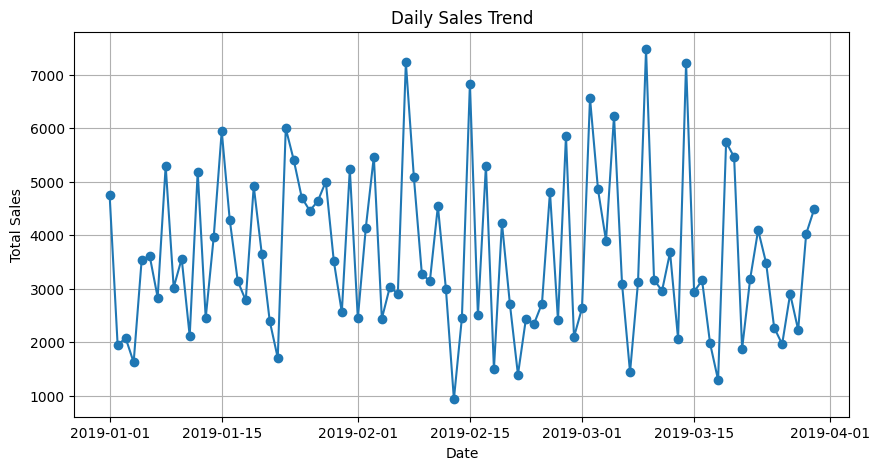

In [9]:
import matplotlib.pyplot as plt

# 每日銷售趨勢
daily_sales = df.groupby('Date')['Total'].sum()

plt.figure(figsize=(10, 5))
plt.plot(daily_sales.index, daily_sales.values, marker='o')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


Linear Regression MSE: 945030.20


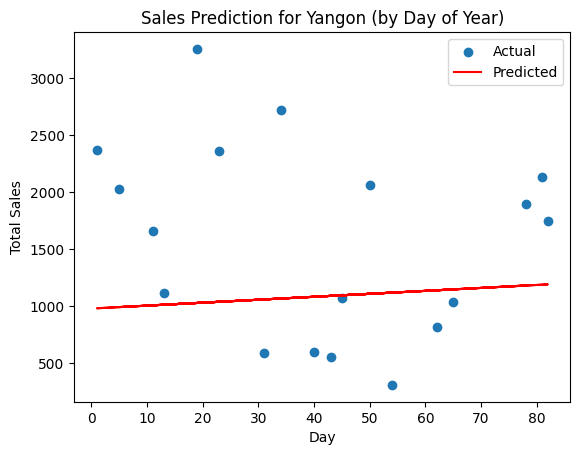

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 取一城市作預測，例如 Yangon
yangon = df[df['City'] == 'Yangon']
daily = yangon.groupby('Day')['Total'].sum().reset_index()

# 特徵與標籤
X = daily[['Day']]
y = daily['Total']

# 分訓練與測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 模型訓練與預測
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.2f}")

# 視覺化預測
plt.scatter(X_test, y_test, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.legend()
plt.title("Sales Prediction for Yangon (by Day of Year)")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.show()
